# Shopping at the Kalverstraat

## Abstract

The Kalverstraat is one of the busiest shopping streets of Amsterdam. Loved by the tourists, hated by locals... Due to tourism the street is barely reachable and extremely expensive! In 2009 it was the 17th most expensive street in the world measured by rent prices ([source](https://web.archive.org/web/20131115020633/http://www.parool.nl/parool/nl/4/AMSTERDAM/article/detail/3544150/2013/11/13/Kalverstraat-stijgt-plek-in-lijst-duurste-winkelstraten.dhtml)).

In this research I would like to identify when I can go shopping with my friends in (relative) peace. I will identify the busiest times and when it is a good time to go shopping. I'll also identify trends between traffic intensity and seasonal variations, f.i. does the rain influence the amount of people? 

## Skills

I have applied the following skills during this research:
- EDA (Exploratory Data Analysis)
- Hypothesis Testing (One-way ANOVA)
- Data Gathering (API of Amsterdam for traffic data)

## Data Source

The data originated from the Langzaam Verkeer Monitoringsysteem Amsterdam ([LVMA](https://data.amsterdam.nl/data/datasets/PnrmHN-YvSqjhw/langzaam-verkeer-monitoringsysteem-amsterdam-lvma/)), or in English, Slow Traffic Monitoringsystem Amsterdam. The data from the LMVA provides information about the amount of passengers in the public space. Slow traffic refers to pedestrians and cyclists. More information can be found on the website of the Municipality of Amsterdam. 

The data has been filtered on the one sensor that can be seen below in the Kalverstraat. The data has also been filtered from 01-01-2023 up to 01-01-2024. Access to the data is via the [REST API](https://api.data.amsterdam.nl/v1/crowdmonitor/passanten/) and technical documentation can be found [here](https://api.data.amsterdam.nl/dcatd/datasets/PnrmHN-YvSqjhw/purls/2).

<img src="./img/sensor_location.png" alt="Sensor Location" style="width: 50%; float: left;"/>
<img src="./img/kalverstraat.png" alt="Sensor view" style="width: 50%; float: right;"/>


## Preparations

Before analysing the data in depth, a few preparations need to be done. The preparations include:

1. Loading the required libraries.
2. Loading the data
4. Cleaning the data (dropping columns, renaming, checking for missing values, check data types etc..)

In [227]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy

In [228]:
df = pd.read_csv("./data/kalverstraat2023.csv")
df.head()

,Unnamed: 0,_links,id,sensor,periode,naamLocatie,datumUur,aantalPassanten,gebied,geometrie
0,0,{'schema': 'https://schemas.data.amsterdam.nl/...,54,CMSA-GAKH-01,uur,Kalverstraat t.h.v. 1,2023-07-05T12:00:00,1150,Winkelgebied centrum,"{'type': 'Point', 'coordinates': [121281.37087..."
1,1,{'schema': 'https://schemas.data.amsterdam.nl/...,434,CMSA-GAKH-01,uur,Kalverstraat t.h.v. 1,2023-05-28T11:00:00,2699,Winkelgebied centrum,"{'type': 'Point', 'coordinates': [121281.37087..."
2,2,{'schema': 'https://schemas.data.amsterdam.nl/...,445,CMSA-GAKH-01,uur,Kalverstraat t.h.v. 1,2023-05-30T04:00:00,75,Winkelgebied centrum,"{'type': 'Point', 'coordinates': [121281.37087..."
3,3,{'schema': 'https://schemas.data.amsterdam.nl/...,953,CMSA-GAKH-01,uur,Kalverstraat t.h.v. 1,2023-10-29T20:00:00,722,Winkelgebied centrum,"{'type': 'Point', 'coordinates': [121281.37087..."
4,4,{'schema': 'https://schemas.data.amsterdam.nl/...,1302,CMSA-GAKH-01,uur,Kalverstraat t.h.v. 1,2023-02-01T18:00:00,2188,Winkelgebied centrum,"{'type': 'Point', 'coordinates': [121281.37087..."


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12770 entries, 0 to 12769
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       12770 non-null  int64 
 1   _links           12770 non-null  object
 2   id               12770 non-null  int64 
 3   sensor           12770 non-null  object
 4   periode          12770 non-null  object
 5   naamLocatie      12770 non-null  object
 6   datumUur         12770 non-null  object
 7   aantalPassanten  12770 non-null  int64 
 8   gebied           12353 non-null  object
 9   geometrie        12353 non-null  object
dtypes: int64(3), object(7)
memory usage: 997.8+ KB


It appears that the attributes gebied and geometrie contain (the same amount) of nan values. Lets look at the entries

In [230]:
df[(df.gebied.isna()) | (df.geometrie.isna())].head()

,Unnamed: 0,_links,id,sensor,periode,naamLocatie,datumUur,aantalPassanten,gebied,geometrie
12353,12353,{'schema': 'https://schemas.data.amsterdam.nl/...,1404086,CMSA-GAKH-01,dag,Kalverstraat t.h.v. 1,2023-11-16T00:00:00,50511,NaN,NaN
12354,12354,{'schema': 'https://schemas.data.amsterdam.nl/...,1404380,CMSA-GAKH-01,dag,Kalverstraat t.h.v. 1,2023-07-31T00:00:00,52940,NaN,NaN
12355,12355,{'schema': 'https://schemas.data.amsterdam.nl/...,1404550,CMSA-GAKH-01,dag,Kalverstraat t.h.v. 1,2023-05-24T00:00:00,55246,NaN,NaN
12356,12356,{'schema': 'https://schemas.data.amsterdam.nl/...,1404693,CMSA-GAKH-01,dag,Kalverstraat t.h.v. 1,2023-12-15T00:00:00,77042,NaN,NaN
12357,12357,{'schema': 'https://schemas.data.amsterdam.nl/...,1404725,CMSA-GAKH-01,dag,Kalverstraat t.h.v. 1,2023-03-31T00:00:00,34091,NaN,NaN


In [231]:
df[(df.gebied.isna()) | (df.geometrie.isna())].head().periode.unique()

array(['dag'], dtype=object)

The missing values appear to be when the period is day. Lets for now skip this because we would like to do our analysis on an hourly basis. Might be good practice to compare amounts of days with the hours and see wether certain dates are missing. 

In [232]:
df.periode.unique()

array(['uur', 'dag', 'week'], dtype=object)

Another good check is to see wether the total amount of hours, days and weeks correspond to the totals of a year. It might be that the sensor had issues on certain days or was turned off. Before doing that, it is important to assign the correct datatypes to the columns to make further analysis possible. 

In [233]:
# dropping irrelevat columns and renaming to English
# fyi, uur=hour, dag=day, week=week

cols = ['id', 'periode', 'datumUur', 'aantalPassanten']
newcols = ['id', 'period', 'datetime', 'countPassengers']

df = df[cols].rename(dict(zip(cols, newcols)), axis=1)
df.head()

,id,period,datetime,countPassengers
0,54,uur,2023-07-05T12:00:00,1150
1,434,uur,2023-05-28T11:00:00,2699
2,445,uur,2023-05-30T04:00:00,75
3,953,uur,2023-10-29T20:00:00,722
4,1302,uur,2023-02-01T18:00:00,2188


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12770 entries, 0 to 12769
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               12770 non-null  int64 
 1   period           12770 non-null  object
 2   datetime         12770 non-null  object
 3   countPassengers  12770 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 399.2+ KB


In [235]:
# transforming the records to the correct datatype where necessary

df['datetime'] = pd.to_datetime(df['datetime'], format="%Y-%m-%dT%H:%M:%S")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12770 entries, 0 to 12769
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               12770 non-null  int64         
 1   period           12770 non-null  object        
 2   datetime         12770 non-null  datetime64[ns]
 3   countPassengers  12770 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 399.2+ KB


In [236]:
df_uur = df[df['period'] == "uur"].drop(['period'], axis=1).sort_values('datetime').reset_index(drop=True).copy()
df_day = df[df['period'] == "dag"].drop(['period'], axis=1).sort_values('datetime').reset_index(drop=True).copy()
df_week = df[df['period'] == "week"].drop(['period'], axis=1).sort_values('datetime').reset_index(drop=True).copy()

df_uur[df_uur.duplicated(subset='datetime', keep=False)]


,id,datetime,countPassengers
0,286187,2023-01-01 00:00:00,3633
1,696190,2023-01-01 00:00:00,3633
3,776538,2023-01-01 02:00:00,893
4,366531,2023-01-01 02:00:00,893
7,71694,2023-01-01 05:00:00,557
...,...,...,...
12341,640413,2023-12-31 14:00:00,6963
12348,782207,2023-12-31 21:00:00,3310
12349,372200,2023-12-31 21:00:00,3310
12350,558518,2023-12-31 22:00:00,3675


In the analysis it was found that many of the values occur twice. I do not have a straight-forward answer on why this is the case, but feel confident that this is done by the sensor for good measure. The countpassenger and datetime are exactly the same. The df for days and weeks do not show this problem. We continue for now by dropping all the second values when datetime and countpassenger are duplicate.

*During later exploration there was a discrepency found between the average count of people per day when looking at the period of hours. The assumption above has been revoked and the duplicates have now been added*

In [237]:
print(f"The size before summing duplicates: {df_uur.shape[0]}")
# df_uur = df_uur.drop_duplicates(subset=['datetime', 'countPassengers'], keep='first')
df_uur = df_uur.groupby('datetime').sum().reset_index()
print(f"The size after summing duplicates: {df_uur.shape[0]}")

The size before summing duplicates: 12353
The size after summing duplicates: 8759


In [238]:
weeks_year = 52
days_year = 365
hours_year = days_year * 24

print(f'The registered hours are {df_uur.shape[0]} which is {df_uur.shape[0] * 100 / hours_year}% of the total number of hours')
print(f'The registered days are {df_day.shape[0]} which is {df_day.shape[0] * 100 / days_year}% of the total number of days')
print(f'The registered weeks are {df_week.shape[0]} which is {df_week.shape[0] * 100 / weeks_year}% of the total number of weeks')

The registered hours are 8759 which is 99.98858447488584% of the total number of hours
The registered days are 365 which is 100.0% of the total number of days
The registered weeks are 52 which is 100.0% of the total number of weeks


It appears that the municipality has done very good bookkeeping !! Lets do a last check to see wether there are any nan values present or zeros. 

In [239]:
print(f'The number of nan values is: {df["countPassengers"].isna().sum()}')
print(f'The number of zero values is: {df["countPassengers"].isnull().sum()}')

The number of nan values is: 0
The number of zero values is: 0


## Exploratory Data Analysis

*Exploring the data by means of statistics and visualization*

Now that we have cleaned our data, we will look at each of the attributes from left to right. In our case though, there is only one attribute at the moment, which is the count of passengers. For this attribute we will look at the following:
1. Do the aggregates per day and week correspond to what we see per hour (data validation)?
2. What does a barchart per hour look like per day of the week? 
3. Are there any exceptional outliers?

Additionally my girlfriend and I also did a little bet on some questions listed in a table below. At the end of the data analysis I will announce the winner, the loser has bought a pizza of a nice italian place in Amsterdam called [salvatore](https://www.salvatore-amsterdam.nl/).

| Questions | Baeda | Sammie |
| --- | --- | --- |
|Busiest day overall | 22nd of December | Kingsday! (27th of April)  |
|Busiest day of the week | Saturday | Saturday |
|Busiest hour during workweek | 17 - 18 | 12 - 13|
|Busiest hour during weekend | 13-14 | 14-15 | 
|Least busy day of the year | 01/01/23 | 01/01/23 |

In [240]:
# Do the aggregates per day and per week correspond to what we see per hour? 

df_uur_to_day = df_uur.copy()
df_uur_to_day['datetime'] = df_uur_to_day['datetime'].dt.date
df_uur_to_day = df_uur_to_day.groupby('datetime').sum()
df_uur_to_day

,id,countPassengers
datetime,,
2023-01-01,22084816,63610
2023-01-02,25843373,59354
2023-01-03,23997185,56043
2023-01-04,23562947,65920
2023-01-05,24192721,66563
...,...,...
2023-12-27,24078537,88119
2023-12-28,22563200,113039
2023-12-29,25664011,85536


In [241]:
print(df_uur_to_day.countPassengers.mean())
print(df_day.countPassengers.mean())
print(df_week.countPassengers.mean()/7)


58822.93424657534
58822.93424657534
58809.78296703297


In [242]:
# What were the busiest days of the week? 

busiest_idx = df_day["countPassengers"].idxmax()
busiest_day = df_day.loc[busiest_idx, 'datetime']
max_passengers = df_day.loc[busiest_idx, 'countPassengers']

quiet_idx = df_day["countPassengers"].idxmin()
quiet_day = df_day.loc[quiet_idx, 'datetime']
min_passengers = df_day.loc[quiet_idx, 'countPassengers']


print(f"The busiest day of the year was {busiest_day} with {max_passengers}")
print(f"The least busy day of the year was {quiet_day} with {min_passengers}")
print(f"On average the amount of passing passengers was: {df_day['countPassengers'].mean()}")

print("--" * 40)
print("\n")
print("The top five busiest days:")
print(df_day.sort_values('countPassengers', ascending=False).head())
print("\n")
print("The top five least busy days:")
print(df_day.sort_values('countPassengers', ascending=False).tail())

The busiest day of the year was 2023-04-19 00:00:00 with 145822
The least busy day of the year was 2023-01-10 00:00:00 with 20032
On average the amount of passing passengers was: 58822.93424657534
--------------------------------------------------------------------------------


The top five busiest days:
          id   datetime  countPassengers
108  1417248 2023-04-19           145822
270  1422576 2023-09-28           134238
361  1405776 2023-12-28           113039
216  1417485 2023-08-05           108325
327  1435417 2023-11-24           104646


The top five least busy days:
          id   datetime  countPassengers
78   1421782 2023-03-20            24928
345  1436170 2023-12-12            23463
15   1407280 2023-01-16            23458
11   1440710 2023-01-12            20164
9    1416247 2023-01-10            20032


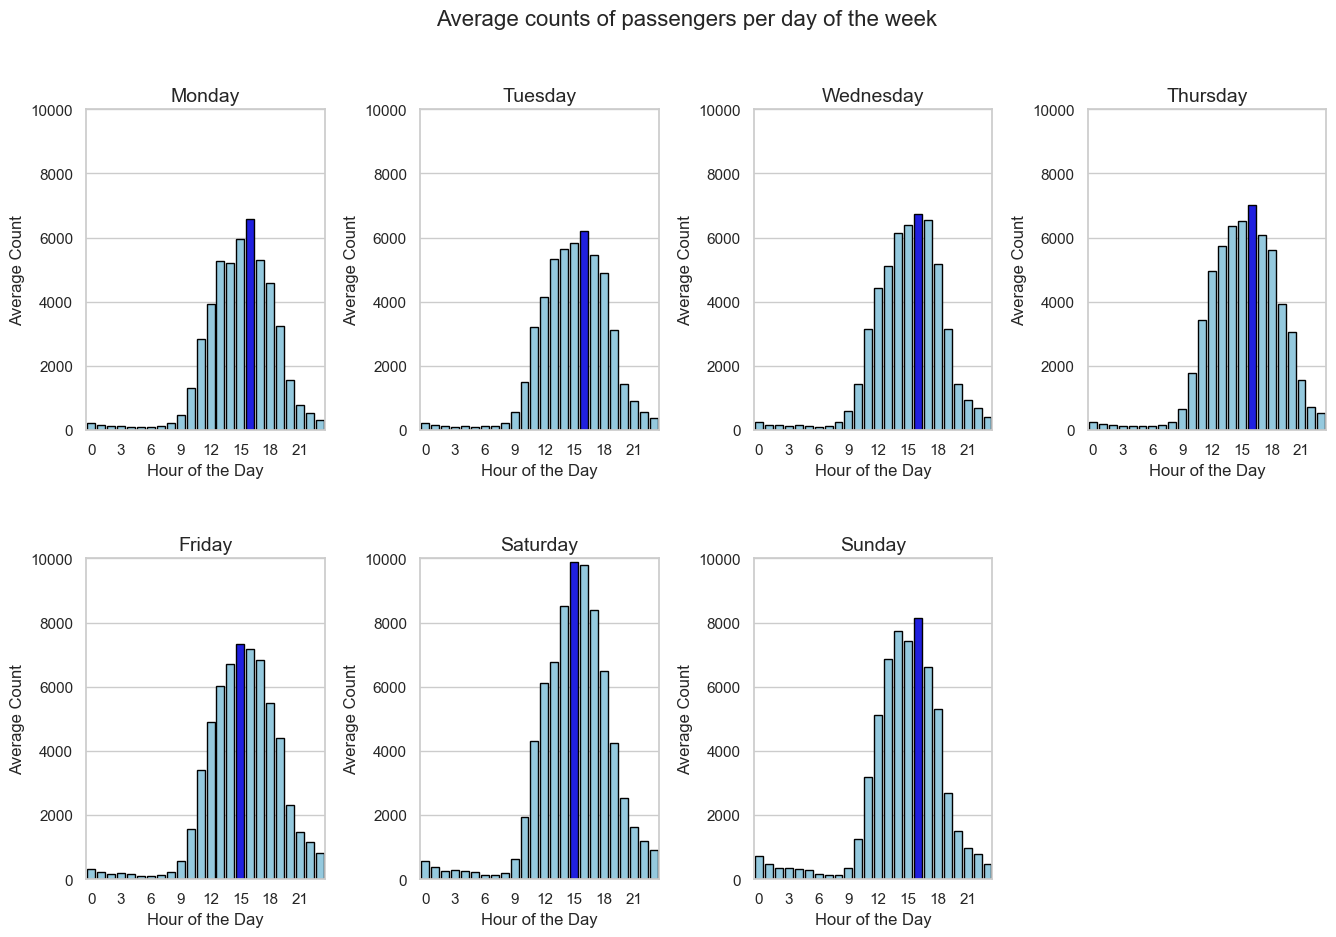

In [243]:

df_uur['dayOfWeek'] = df_uur['datetime'].dt.day_name()
df_uur['hour'] = df_uur['datetime'].dt.hour


sns.set_theme(style="whitegrid")

fig, axs = plt.subplots(2, 4, figsize=(16, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

for i, day in enumerate(days):
    ax = axs[i//4, i%4]

    day_data = df_uur[(df_uur['dayOfWeek'] == day)]
    mean_counts = day_data.groupby('hour')['countPassengers'].mean()
    max_count = mean_counts.max()

    mean_counts_df = mean_counts.reset_index()
    mean_counts_df['is_max'] = mean_counts_df['countPassengers'] == max_count

    sns.barplot(data=mean_counts_df, x='hour', y='countPassengers', hue='is_max', dodge=False, ax=ax, palette={True: 'blue', False: 'skyblue'}, edgecolor='black')
    ax.set_title(day, fontsize=14)  # Set the title to the day
    ax.set_xlabel('Hour of the Day', fontsize=12)
    ax.set_ylabel('Average Count', fontsize=12)
    ax.set_xticks(range(0, 24, 3))
    ax.set_ylim(0, 10000)
    ax.get_legend().remove()  # Remove legend for individual plots

# Remove the last empty subplot
fig.delaxes(axs[1][3])

fig.suptitle('Average counts of passengers per day of the week', fontsize=16)

plt.show()

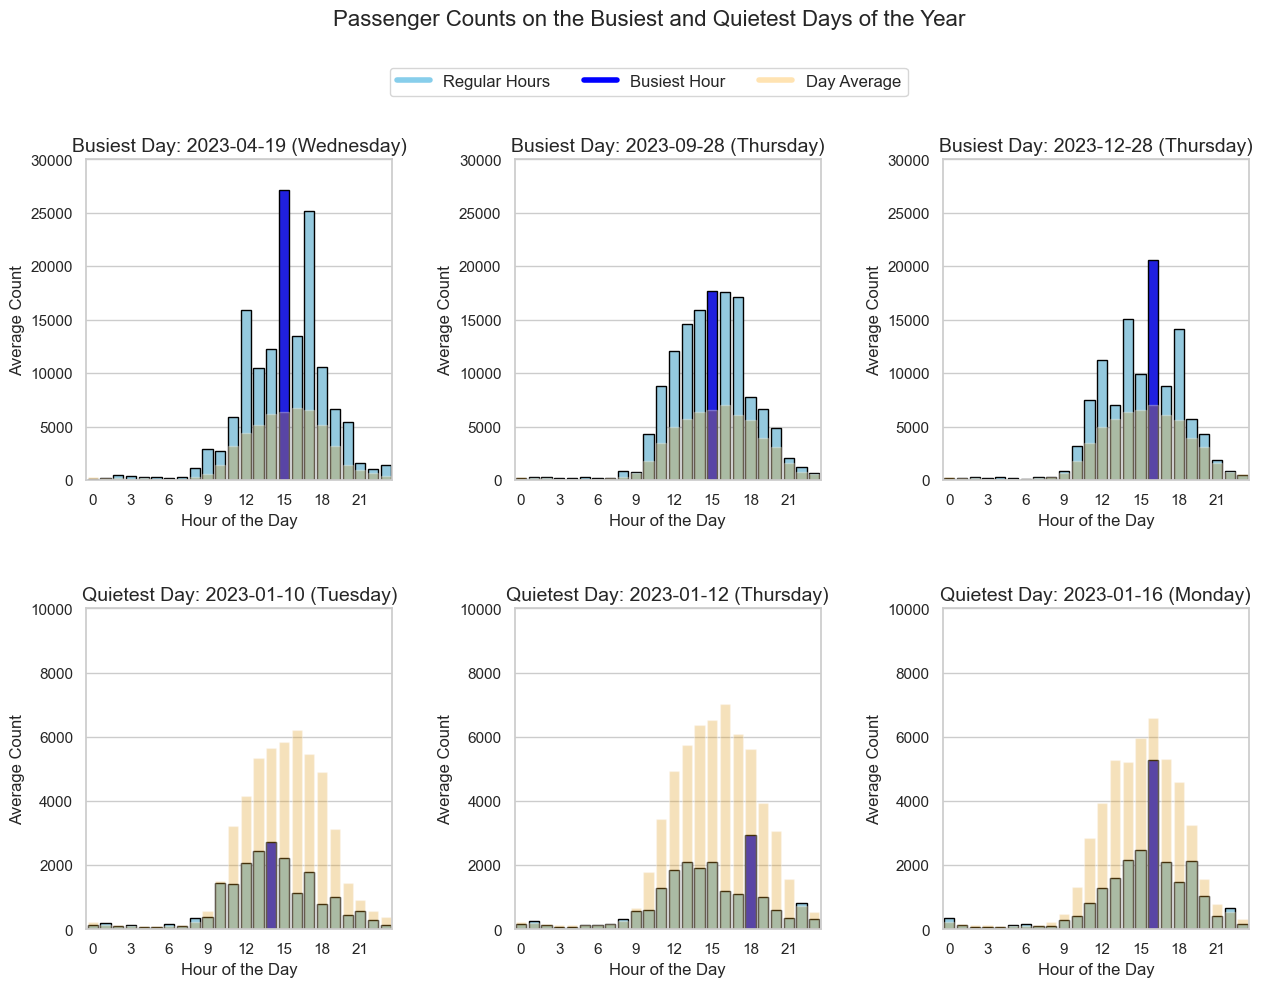

In [244]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_uur is already defined and contains the necessary data
df_uur['dayOfWeek'] = df_uur['datetime'].dt.day_name()
df_uur['hour'] = df_uur['datetime'].dt.hour
df_uur['date'] = df_uur['datetime'].dt.date  # Extract date only for aggregation

# Aggregate passenger counts by date
df_day_from_hour = df_uur.groupby('date')['countPassengers'].sum().reset_index()

# Identify the top 3 busiest and quietest days
top_3_busiest_days = df_day_from_hour.nlargest(3, 'countPassengers')['date']
top_3_quietest_days = df_day_from_hour.nsmallest(3, 'countPassengers')['date']

# Filter the hourly data for these days
top_3_busiest = df_uur[df_uur['date'].isin(top_3_busiest_days)]
top_3_quietest = df_uur[df_uur['date'].isin(top_3_quietest_days)]

# Set Seaborn style
sns.set(style="whitegrid")

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Helper function to plot data
def plot_day(ax, day_data, day_of_week_data, title, ylim):
    mean_counts = day_data.groupby('hour')['countPassengers'].mean()
    max_count = mean_counts.max()

    mean_counts_df = mean_counts.reset_index()
    mean_counts_df['is_max'] = mean_counts_df['countPassengers'] == max_count

    # Plot hourly counts
    sns.barplot(data=mean_counts_df, x='hour', y='countPassengers', hue='is_max', dodge=False, ax=ax, palette={True: 'blue', False: 'skyblue'}, edgecolor='black')

    # Overlay weekly average
    sns.barplot(data=day_of_week_data, x='hour', y='countPassengers', color='orange', alpha=0.3, ax=ax, errorbar=None)

    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Hour of the Day', fontsize=12)
    ax.set_ylabel('Average Count', fontsize=12)
    ax.set_xticks(range(0, 24, 3))
    ax.set_ylim(0, ylim)
    ax.get_legend().remove()  # Remove legend for individual plots

# Plot the top 3 busiest days
for i, date in enumerate(top_3_busiest_days):
    day_data = df_uur[df_uur['date'] == date]
    day_of_week = day_data['dayOfWeek'].iloc[0]
    day_of_week_data = df_uur[df_uur['dayOfWeek'] == day_of_week].groupby('hour')['countPassengers'].mean().reset_index()
    plot_day(axs[0, i], day_data, day_of_week_data, f"Busiest Day: {date} ({day_of_week})", 30000)

# Plot the top 3 quietest days
for i, date in enumerate(top_3_quietest_days):
    day_data = df_uur[df_uur['date'] == date]
    day_of_week = day_data['dayOfWeek'].iloc[0]
    day_of_week_data = df_uur[df_uur['dayOfWeek'] == day_of_week].groupby('hour')['countPassengers'].mean().reset_index()
    plot_day(axs[1, i], day_data, day_of_week_data, f"Quietest Day: {date} ({day_of_week})", 10000)

# Create custom legend
handles = [
    plt.Line2D([0], [0], color='skyblue', lw=4, label='Regular Hours'),
    plt.Line2D([0], [0], color='blue', lw=4, label='Busiest Hour'),
    plt.Line2D([0], [0], color='orange', lw=4, alpha=0.3, label='Day Average')
]

fig.suptitle('Passenger Counts on the Busiest and Quietest Days of the Year', fontsize=16, y=1.03)
fig.legend(handles=handles, loc='upper center', ncol=3, fontsize=12, bbox_to_anchor=(0.5, 0.98))

plt.show()


Sadly, I lost... Apparently  However, still had great pizza :D. I find it suprising to see how little variation there is between the days of the week. We can see a small increase from Monday towards the weekend, peaking at Saturdays. We can also see that 'rush-hour' on Friday starts an hour earlier than on regular weekdays around four. I expected somewhat of a spike during weekdays at lunch, but cannot really find that (main reason why I had to buy pizza).

When we look at the barcharts for the busiest and quitest days, it can be observerd that all the quitest days occur during winter, is this a coincidence? We will test this hypothesis that seasons affect the traffic in the next section. On our busiest day, we can see clear spikes in traffic on three hours, being 12, 15 and 17. I tried to search online but could not really find anything that day that could explain these peaks though.

# KNMI data (bonus)

In the EDA above, we had a hunch that the seasonal variations might have an effect on the amount of traffic on a day in the Kalverstraat. Before forming such hypothesis, we will also include weather data of each particular date. This is done to limit the amount of bias in drawing this conclusion. One could imagine, for instance, that it rains a lot more in the winter/autumn, which leads to less people shopping, and can therefore cause us to draw the wrong conclusion.

The data is provided by the KNMI (Royal Dutch Institute of Metereology), see [this link](https://daggegevens.knmi.nl/). The data has been downloaded for the weather station at Schiphol Airport with the parameters below:


- TG        : Etmaalgemiddelde temperatuur (in 0.1 graden Celsius) / Daily mean temperature in (0.1 degrees Celsius)
- TN        : Minimum temperatuur (in 0.1 graden Celsius) / Minimum temperature (in 0.1 degrees Celsius)
- TNH       : Uurvak waarin TN is gemeten / Hourly division in which TN was measured
- TX        : Maximum temperatuur (in 0.1 graden Celsius) / Maximum temperature (in 0.1 degrees Celsius)
- TXH       : Uurvak waarin TX is gemeten / Hourly division in which TX was measured
- DR        : Duur van de neerslag (in 0.1 uur) / Precipitation duration (in 0.1 hour)
- RH        : Etmaalsom van de neerslag (in 0.1 mm) (-1 voor <0.05 mm) / Daily precipitation amount (in 0.1 mm) (-1 for <0.05 mm)
- RHX       : Hoogste uursom van de neerslag (in 0.1 mm) (-1 voor <0.05 mm) / Maximum hourly precipitation amount (in 0.1 mm) (-1 for <0.05 mm)
- NG        : Etmaalgemiddelde bewolking (bedekkingsgraad van de bovenlucht in achtsten; 9=bovenlucht onzichtbaar) / Mean daily cloud cover (in octants; 9=sky invisible)

In [245]:
df_knmi = pd.read_csv("data/schiphol.csv", delimiter=",")

In [246]:
df_knmi.head()

,STN,YYYYMMDD,TG,TN,TNH,TX,TXH,DR,RH,RHX,NG
0,240,20230101,119,104,21,145,3,46,57,19,8
1,240,20230102,80,20,24,114,4,41,34,22,6
2,240,20230103,60,3,3,94,23,21,19,14,7
3,240,20230104,117,90,1,132,14,60,105,28,8
4,240,20230105,105,97,17,116,12,22,9,3,8


In [247]:
df_knmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0     STN     365 non-null    int64
 1   YYYYMMDD  365 non-null    int64
 2      TG     365 non-null    int64
 3      TN     365 non-null    int64
 4     TNH     365 non-null    int64
 5      TX     365 non-null    int64
 6     TXH     365 non-null    int64
 7      DR     365 non-null    int64
 8      RH     365 non-null    int64
 9     RHX     365 non-null    int64
 10     NG     365 non-null    int64
dtypes: int64(11)
memory usage: 31.5 KB


In [248]:
# Set the correct datatypes
df_knmi['datetime'] = pd.to_datetime(df_knmi["YYYYMMDD"], format="%Y%m%d")
df_knmi = df_knmi.drop(labels=['YYYYMMDD', '  STN'], axis=1)
df_knmi = df_knmi.rename(columns=lambda x: x.lstrip())

int_cols = df_knmi.select_dtypes("int64").columns
int_cols = int_cols.drop(['NG', 'TNH', 'TXH'])

df_knmi[['TNH', 'TXH']] = df_knmi[['TNH', 'TXH']] - 1

df_knmi[int_cols] = df_knmi[int_cols].apply(lambda x: x.astype(float) / 10)

In [249]:
df_knmi.describe()

,TG,TN,TNH,TX,TXH,DR,RH,RHX,NG,datetime
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365
mean,11.980548,8.337808,10.364384,15.410137,12.364384,2.196986,2.985753,1.033973,6.331507,2023-07-02 00:00:00
min,-0.900000,-5.100000,0.000000,0.700000,0.000000,0.000000,-0.100000,-0.100000,0.000000,2023-01-01 00:00:00
25%,8.000000,4.500000,2.000000,10.300000,11.000000,0.000000,0.000000,0.000000,5.000000,2023-04-02 00:00:00
50%,11.300000,8.600000,5.000000,14.700000,13.000000,0.600000,0.300000,0.200000,7.000000,2023-07-02 00:00:00
75%,16.800000,12.800000,22.000000,20.700000,14.000000,3.300000,3.900000,1.600000,8.000000,2023-10-01 00:00:00
max,25.200000,18.700000,23.000000,31.800000,23.000000,17.400000,32.500000,14.300000,8.000000,2023-12-31 00:00:00
std,5.849784,5.481627,9.482856,6.646906,4.151174,3.280875,4.981815,1.687493,2.073437,NaN


array([[<Axes: title={'center': 'TG'}>, <Axes: title={'center': 'TN'}>,
        <Axes: title={'center': 'TNH'}>],
       [<Axes: title={'center': 'TX'}>, <Axes: title={'center': 'TXH'}>,
        <Axes: title={'center': 'DR'}>],
       [<Axes: title={'center': 'RH'}>, <Axes: title={'center': 'RHX'}>,
        <Axes: title={'center': 'NG'}>]], dtype=object)

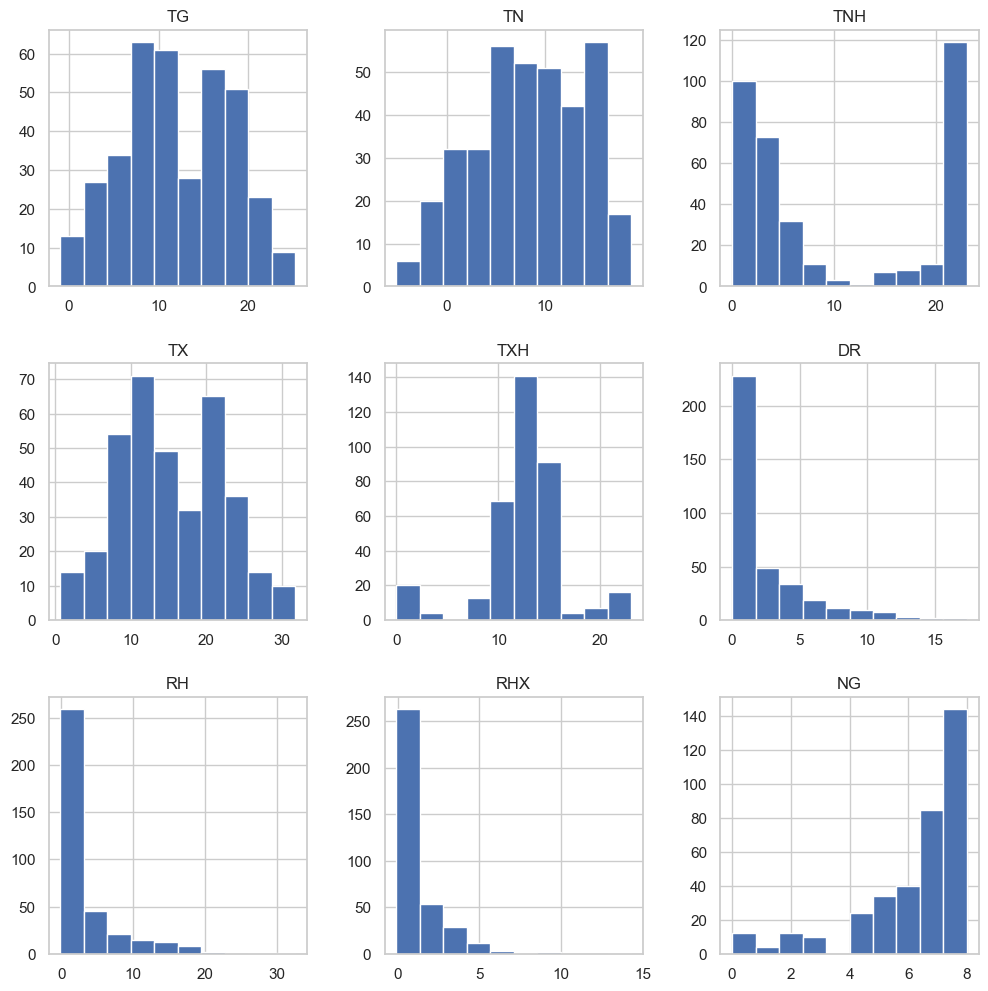

In [250]:
fig, axis = plt.subplots(3, 3, figsize=(12, 12))

df_knmi.select_dtypes(("float", "int64")).hist(ax=axis)

From the data statistics above it can be seen that the data is clean. There are no missing value or extreme outliers. In the following cells we will try to identify wether any of the parameters describing the weather have a correlation with the amount of traffic in a street. In the histogram of the weekdays, it can be seen that the traffic intensity is relatively similar for the weekdays and differs for the weekends. So to prevent this variation on misguiding our results, we'll only look at the weekdays for now. 

In [251]:
df_day

,id,datetime,countPassengers
0,1444195,2023-01-01,63610
1,1419279,2023-01-02,59354
2,1444678,2023-01-03,56043
3,1434102,2023-01-04,65920
4,1419610,2023-01-05,66563
...,...,...,...
360,1445484,2023-12-27,88119
361,1405776,2023-12-28,113039
362,1426960,2023-12-29,85536
363,1434415,2023-12-30,91495


In [252]:
df_day_weather = pd.merge(left=df_day, right=df_knmi, how='left', on='datetime')
df_day_weather['dayOfWeek'] = df_day_weather['datetime'].dt.dayofweek

df_day_weather.head()

,id,datetime,countPassengers,TG,TN,TNH,TX,TXH,DR,RH,RHX,NG,dayOfWeek
0,1444195,2023-01-01,63610,11.9,10.4,20,14.5,2,4.6,5.7,1.9,8,6
1,1419279,2023-01-02,59354,8.0,2.0,23,11.4,3,4.1,3.4,2.2,6,0
2,1444678,2023-01-03,56043,6.0,0.3,2,9.4,22,2.1,1.9,1.4,7,1
3,1434102,2023-01-04,65920,11.7,9.0,0,13.2,13,6.0,10.5,2.8,8,2
4,1419610,2023-01-05,66563,10.5,9.7,16,11.6,11,2.2,0.9,0.3,8,3


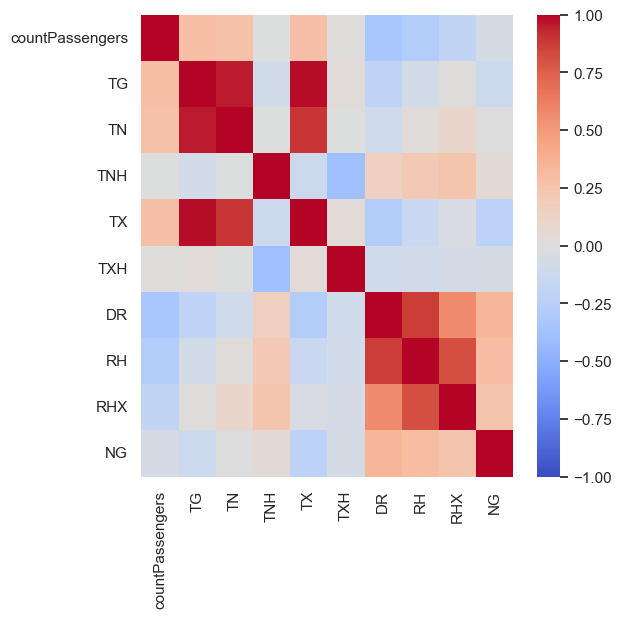

In [253]:
fig, ax = plt.subplots(figsize=(6, 6))
corr = df_day_weather.loc[df_day_weather['dayOfWeek'] < 5].drop(['datetime', 'dayOfWeek', 'id'], axis=1).corr()
ax = sns.heatmap(corr, ax=ax,
                 vmin=-1,
                 center=0,
                 linecolor='gray',
                 cmap='coolwarm',
                 vmax=1)

In [254]:
corr

,countPassengers,TG,TN,TNH,TX,TXH,DR,RH,RHX,NG
countPassengers,1.000000,0.288628,0.272554,-0.001937,0.278932,0.011394,-0.336955,-0.277904,-0.187807,-0.057372
TG,0.288628,1.000000,0.958485,-0.078701,0.979073,0.026214,-0.204338,-0.081753,0.011219,-0.124346
TN,0.272554,0.958485,1.000000,-0.007670,0.897198,-0.004056,-0.097730,0.021426,0.093452,0.007088
TNH,-0.001937,-0.078701,-0.007670,1.000000,-0.124800,-0.386919,0.160063,0.218447,0.242976,0.051313
TX,0.278932,0.979073,0.897198,-0.124800,1.000000,0.035129,-0.275786,-0.146323,-0.033247,-0.224355
TXH,0.011394,0.026214,-0.004056,-0.386919,0.035129,1.000000,-0.099934,-0.088373,-0.069816,-0.062363
DR,-0.336955,-0.204338,-0.097730,0.160063,-0.275786,-0.099934,1.000000,0.867661,0.565409,0.347262
RH,-0.277904,-0.081753,0.021426,0.218447,-0.146323,-0.088373,0.867661,1.000000,0.815170,0.303272
RHX,-0.187807,0.011219,0.093452,0.242976,-0.033247,-0.069816,0.565409,0.815170,1.000000,0.254654
NG,-0.057372,-0.124346,0.007088,0.051313,-0.224355,-0.062363,0.347262,0.303272,0.254654,1.000000


No significant correlation between the predictors (weather parameters) and the target (Count of passengers) is found. Only a small correlation between the temperature and amount of percipitation. Due to the high correlations between the couples (TG, TN) and (DR, RH and RHX) plus negligble influence of NG. These will for now no longer be considered and the average temperature and precipitation will be used instead.

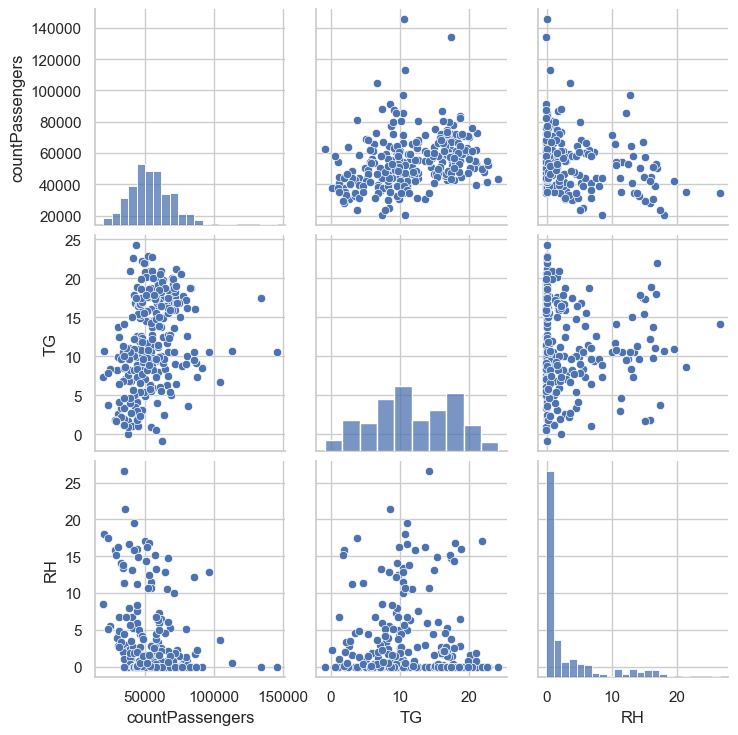

In [255]:
drop_cols = ['TN', 'TNH', 'TX', 'TXH', 'DR', 'RHX', 'NG']
df_day_weather = df_day_weather.drop(drop_cols, axis=1)

sns.pairplot(df_day_weather.loc[df_day_weather['dayOfWeek'] < 5].drop(['datetime', 'dayOfWeek', 'id'], axis=1))

The plot above shows a small positive correlation between the countPassengers target and the temperature. For the precipitation we cannot really distinguish a strong linear relationship.

Lets also try to explain the 'extreme' values of the countPassenger variable by sorting the dataframe on countpassenger and only use the twenty days with the most and least amount of visitors and plot the same scatterplot. This to identify wether the extreme days could be explained by bad weather. 

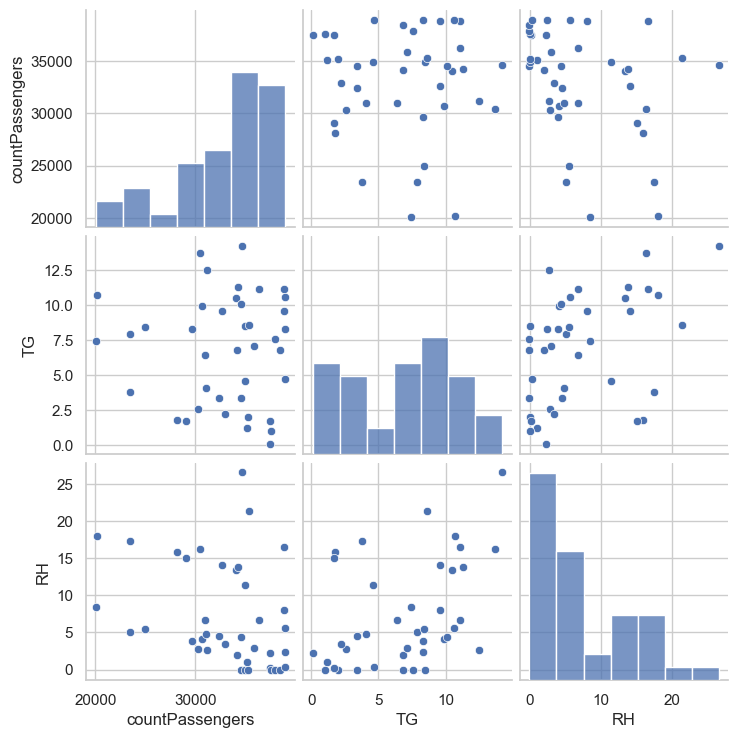

In [256]:
df_day_weather = df_day_weather.sort_values(by='countPassengers', ascending=True)

df_low = df_day_weather.head(40)
df_high = df_day_weather.tail(40)

sns.pairplot(df_low.loc[df_low['dayOfWeek'] < 5].drop(['datetime', 'dayOfWeek', 'id'], axis=1))

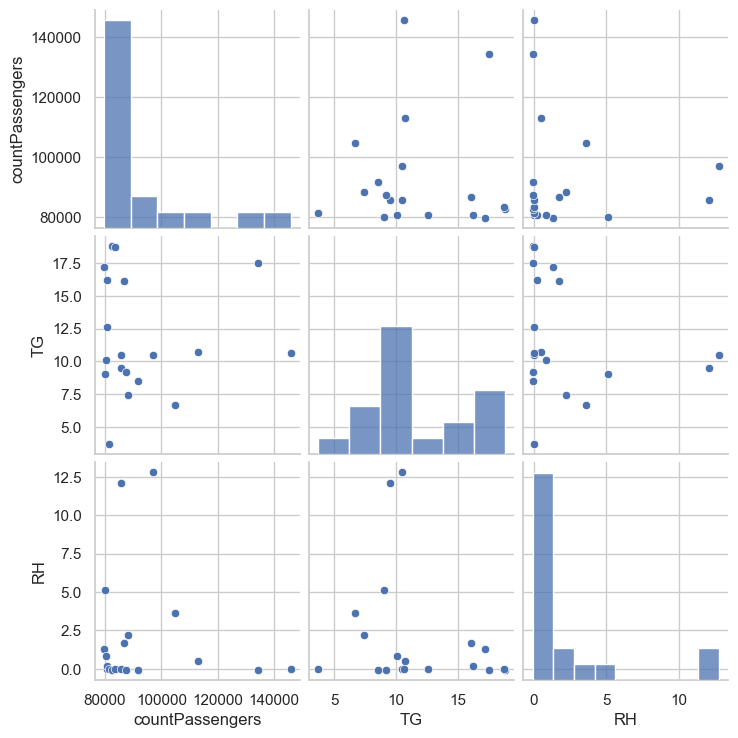

In [257]:
sns.pairplot(df_high.loc[df_high['dayOfWeek'] < 5].drop(['datetime', 'dayOfWeek', 'id'], axis=1))

The scatterplots above show no real relationship. Although the sample size of the extremes is relatively small, I think it is save to say that the chosen weather paramters do not explain the extremes. It is more likely that this is due to events happening at those days for instance. 

Lets go back to our first hunch that seasonal variations might affect the amount of visitors on a given day. To do this we will first make a scatterplot of the amount of passengers for each day provide a box plot for each of the seasons. 

In [258]:
df_day_weather = df_day_weather.sort_values('datetime', ascending=True)

df_day_weather.loc[(df_day_weather['datetime'] >= '21-03-2023') & (df_day_weather['datetime'] < '21-06-2023'), 'season'] = 'spring'
df_day_weather.loc[(df_day_weather['datetime'] >= '21-06-2023') & (df_day_weather['datetime'] < '21-09-2023'), 'season'] = 'summer'
df_day_weather.loc[(df_day_weather['datetime'] >= '21-09-2023') & (df_day_weather['datetime'] < '21-12-2023'), 'season'] = 'autumn'
df_day_weather.loc[df_day_weather['season'].isna(), 'season'] = 'winter'

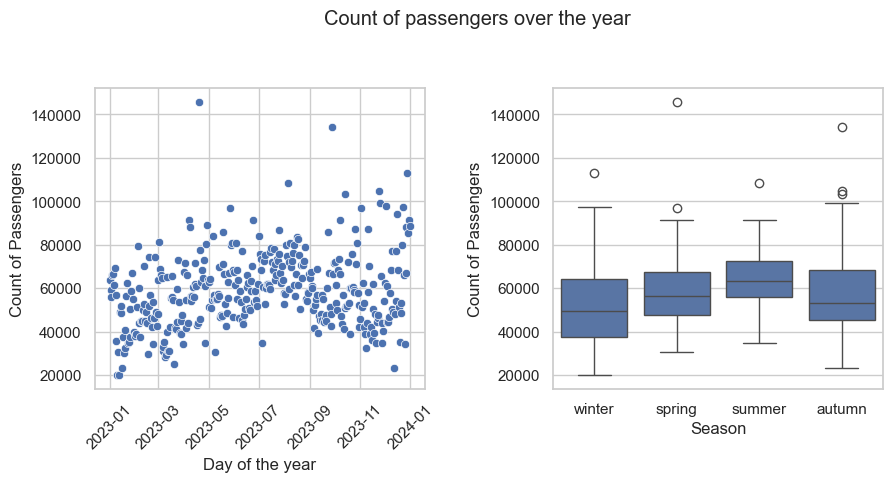

In [259]:
fig, axis = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(pad=5)

axis = axis.flatten()

sns.scatterplot(df_day_weather, x='datetime', y='countPassengers', ax=axis[0])
axis[0].set_xlabel('Day of the year')
axis[0].set_ylabel('Count of Passengers')
axis[0].tick_params(axis='x', rotation=45)

sns.boxplot(df_day_weather, x='season', y='countPassengers')
axis[1].set_xlabel('Season')
axis[1].set_ylabel('Count of Passengers')

fig.suptitle('Count of passengers over the year')
plt.show()

## Hypothesis testing

From the boxplot above, it can be seen that the mean amount of passengers in the Kalverstraat appears to be higher during the spring and summer months. 

H0 = There is no difference in amount of passengers during different seasons
H1 = There is a difference in amount of passengers during different seasons. 

Because we are testing for a statistical significant difference amongst the groups, we do an analysis called ANOVA (Analysis of Variance).

For ANOVA we have to comply to the following conditions:
1. Independence of Observations: It can be assumed that the data from one group (one season) is independent of the other. It is unlikely that the amount of passengers in spring affects for instance the amount of people in winter.
2. Normality: The data within each group should be approximately normally distributed. This can be ensured by grabing a large enough sample size (e.g. 30) and performing the test enough times to ensure CLT takes hold.
3. Homogeneity of Variances: The variances among the groups should be approximately equal.



In [260]:
import scipy.stats

seasons = ['winter', 'spring', 'autumn', 'summer']

winter, spring, autumn, summer = [df_day_weather.loc[df_day_weather['season'] == season, 'countPassengers'] for season in seasons]

F, p = scipy.stats.f_oneway(winter, spring, autumn, summer)

print(f'The F-statistic is: \t{F}')
print(f'The p-value is: \t{p}')

The F-statistic is: 	8.34561048532678
The p-value is: 	2.2256548361591596e-05


Given that the p-value is very low, it is save to say that the seasons affect the amount of passengers in the Kalverstraat. We therefore reject the null-hypothesis that seasons do not affect the amount of passengers in the Kalverstraat.

In [261]:
df_day_weather.loc[df_day_weather['season'] == 'winter', 'countPassengers'].median()

49640.5

# Conclusion

The data from the sensor on the Kalverstraat has given us a better insight in the behavior of shoppers during the year. First we dove into the data of the sensor, trying to find patterns in the shopping behavior. Next, we also included parameters from the KNMI to draw conclusions on the effect of weather on the amount of passengers. After, we proved our hypothesis that seasons affect the amount of passengers in the Kalverstraat. The following observations have been made and tested and can give us a better understanding of when to go shopping:

1. The summer months are the busiest, with a median of 63.442 visitors each day. 
2. The winter months are the quitest, with a median of 49.640 visitors each day.
3. The busiest time in the kalverstraat is typically around 4 PM. On a Friday and Saturday this shifts toward 3 PM.
4. The weather does not appear to really affect the amount of passengers for a given day. 
5. If you wish to have free food, place a bet with me...

Overall advice would be to go shopping early in the morning on a winter day, but avoid the period around Christmas in this case. Avoid 3-4PM as the plague, at these times the most people are always found.

## Recomendations

This project was done for educational purposes to refresh my knowledge on general statistics and to have some fun with the API from Amsterdam. Overall I can give some recommendations that either increase the reliability of the results or to further dive into the data:
1. Increase the timespan of the measurements.
2. Compare the data against the ones from different sensor.
3. Try to make a prediction model to estimate how many passengers will visit on a given day. 

I hope you found this a fun read, see you next time!

